<a href="https://colab.research.google.com/github/sudhan6/Youtube-Video-Summerization-using-Transformers/blob/main/Video_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download YouTube Video's Audio

In [1]:
! pip install pytube -q #For downloading video on a specific quality

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00


In [2]:
from pytube import YouTube #The YouTube class from the pytube library provides methods for interacting with YouTube video

In [3]:
#VIDEO_URL = "https://www.youtube.com/watch?v=hWLf6JFbZoo" #obama
VIDEO_URL = "https://www.youtube.com/watch?v=Ex-OFVaxHsE"

In [4]:
yt = YouTube(VIDEO_URL) #save video to variable yt

In [5]:
yt.streams.filter(only_audio = True, file_extension = 'mp4').first().download(filename = 'ytaudio.mp4') #download mp4 audio from the video and save the file

'/content/ytaudio.mp4'

In [6]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav #used to convert the audio file using the FFmpeg tool

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

#English ASR with HuggingSound

In [7]:
!pip install huggingsound -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from huggingsound import SpeechRecognitionModel #To perform speach recognition tasks


In [9]:
import torch #mathematical operation , building and training neural networks
device = "cuda" if torch.cuda.is_available() else "cpu" #to ensure it is running in gpu for a better runtime

In [10]:
device #it is runnning in gpu

'cuda'

In [11]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device) #import english lang from SpeecRecognitionModel


INFO:huggingsound.speech_recognition.model:Loading model...


#Audio Chunking

In [12]:
import librosa #It is a Python library for analyzing and manipulating audio data

In [13]:
input_file = '/content/ytaudio.wav' #import the extracted audio to input_file

In [14]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000, #size of the frames
    hop_length=16000    #the number of samples between the start of one frame and the start of the next.
)

16000


In [15]:
import soundfile as sf #library for reading and writing audio files

In [16]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [17]:
i

7

#Audio Transcription / ASR / Speech to Text

In [18]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/{a}.wav')

In [19]:
audio_path

['/content/0.wav',
 '/content/1.wav',
 '/content/2.wav',
 '/content/3.wav',
 '/content/4.wav',
 '/content/5.wav',
 '/content/6.wav',
 '/content/7.wav']

In [20]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 8/8 [00:07<00:00,  1.14it/s]


In [21]:
full_transcript = ' '

In [22]:
for item in transcriptions:
  full_transcript += ''.join(item['transcription'])

In [23]:
full_transcript

" fellow subscribers my powen and u watching optimisticcoder if you're nutimy channel subscribe and hit that notification bell so that you don't miss any of these tatorialsfello subscribers in todays video we will be discussing what is jdk j ari and jvm in detail so before moving into the topic let's take an example to understand the concept better so let us consider there is a lamp shop and the shop owner is having all types of equipment which i required to build a lamp so he will be having allthe toolkit which is required to build a new lamp or a variety of redothers but whereas his customer is least bothered about any tools that he is singthey are only interested in buying a new lamp and just usitso let's take this senario and we can try to understand the conceptin this we can replace the shop owner with jawa developer who is going to develop and execute the core whereas we can replace the customers with client who is just going o execute it because they are not bothered aboutthe de

#Text Summarization

In [24]:
from transformers import pipeline #performing various natural language processing

In [25]:
summarization = pipeline('summarization') #access to a pre-trained model and tokenizer

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [26]:
summarized_text = summarization(full_transcript)

In [27]:
summarized_text[0]['summary_text']

' Java program executes a complete flow diagram from the start to the end how does java program execute so as we can see the compiled dimonnvironment java source cord program will become piled using javac compiler and dot-classfye will be generated . Java interpreter is going to execute the instructions line by line so every instruction will be executedonce at a timeso because of this if any of the instruction has to be executed multiple times for example hundred times whenever we have loop in a program then the interpreter will execute hundred times that particular instruction .'

###Text Chunking before Summarization

In [28]:
num_iters = int(len(full_transcript)/1000)
summarized_text2 = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  #print("input text \n" + full_transcript[start:end])
  out = summarization(full_transcript[start:end], min_length = 5, max_length=20)
  out = out[0]
  out = out['summary_text']
 # print("Summarized text\n"+out)
  summarized_text2.append(out)

print(summarized_text2)

[' Tatorialsfello will discuss what is jdk j ari and jvm', ' Java program is compiled using javac compiler and dot-classfye will be', ' When java interpreter gets he bite code it executes the instructions line by line so every instruction', ' Gerium is used to execute the bite code with the help of interpretor and j']


##Evaluation Metrics

In [29]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from rouge import Rouge
rouge = Rouge()

# generate the summary using the code you provided
generated_summary = summarization(full_transcript)[0]['summary_text']

# calculate the ROUGE scores
scores = rouge.get_scores(generated_summary, full_transcript)
rouge_1_recall = scores[0]['rouge-1']['r']
rouge_1_precision = scores[0]['rouge-1']['p']
rouge_1_f1_score = scores[0]['rouge-1']['f']
rouge_2_recall = scores[0]['rouge-2']['r']
rouge_2_precision = scores[0]['rouge-2']['p']
rouge_2_f1_score = scores[0]['rouge-2']['f']
rouge_l_recall = scores[0]['rouge-l']['r']
rouge_l_precision = scores[0]['rouge-l']['p']
rouge_l_f1_score = scores[0]['rouge-l']['f']

# print the ROUGE scores
print("ROUGE-1 recall: ", rouge_1_recall)
print("ROUGE-1 precision: ", rouge_1_precision)
print("ROUGE-1 F1 score: ", rouge_1_f1_score)
print("ROUGE-2 recall: ", rouge_2_recall)
print("ROUGE-2 precision: ", rouge_2_precision)
print("ROUGE-2 F1 score: ", rouge_2_f1_score)
print("ROUGE-L recall: ", rouge_l_recall)
print("ROUGE-L precision: ", rouge_l_precision)
print("ROUGE-L F1 score: ", rouge_l_f1_score)

ROUGE-1 recall:  0.24521072796934865
ROUGE-1 precision:  0.9846153846153847
ROUGE-1 F1 score:  0.3926380336171854
ROUGE-2 recall:  0.1749502982107356
ROUGE-2 precision:  0.946236559139785
ROUGE-2 F1 score:  0.29530201078898477
ROUGE-L recall:  0.2413793103448276
ROUGE-L precision:  0.9692307692307692
ROUGE-L F1 score:  0.3865030642920322


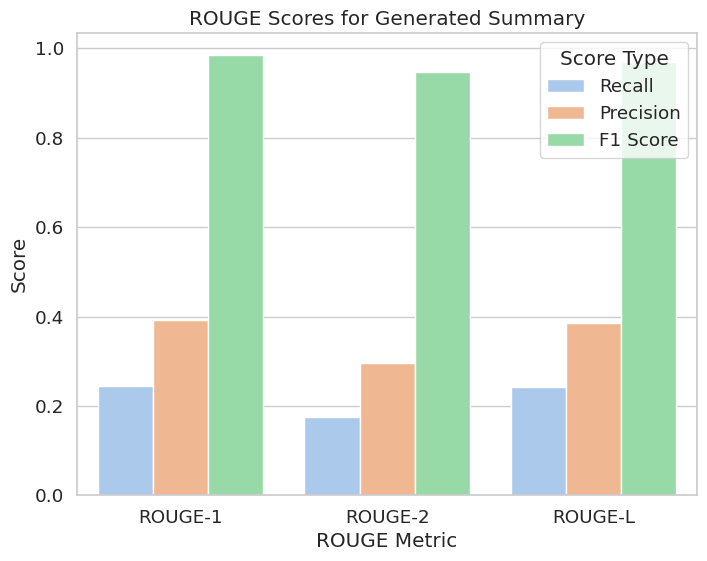

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the ROUGE metrics and scores
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
recall_scores = [rouge_1_recall, rouge_2_recall, rouge_l_recall]
precision_scores = [rouge_1_precision, rouge_2_precision, rouge_l_precision]
f1_scores = [rouge_1_f1_score, rouge_2_f1_score, rouge_l_f1_score]

# Create a pandas DataFrame with the scores
df = pd.DataFrame({'Metric': metrics, 'Recall': recall_scores, 'Precision': f1_scores, 'F1 Score': precision_scores})

# Reshape the DataFrame to long format for visualization
df_long = pd.melt(df, id_vars=['Metric'], var_name='Score Type', value_name='Score')

# Set up the figure
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scores as a bar plot with colored bars
sns.barplot(x='Metric', y='Score', hue='Score Type', data=df_long, ax=ax, palette='pastel')

# Add labels, titles, and legend
ax.set_xlabel('ROUGE Metric')
ax.set_ylabel('Score')
ax.set_title('ROUGE Scores for Generated Summary')
ax.legend(title='Score Type', loc='upper right')

# Show the plot
plt.show()
